In [54]:
import pandas as pd
import numpy as np
import os

In [55]:
data = pd.read_stata('/home/jovyan/Desktop/UCSD/Spring/MGTA495/lulu_marketing_analytics/blog/Project1/karlan_list_2007.dta')
data

,treatment,control,ratio,ratio2,ratio3,size,size25,size50,size100,sizeno,...,redcty,bluecty,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
0,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.446493,0.527769,0.317591,2.10,28517.0,0.499807,0.324528,1.000000
1,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,1,0,0,"$100,000",0,0,1,0,...,0.0,1.0,0.935706,0.011948,0.276128,2.48,51175.0,0.721941,0.192668,1.000000
3,1,0,1,0,0,Unstated,0,0,0,1,...,1.0,0.0,0.888331,0.010760,0.279412,2.65,79269.0,0.920431,0.412142,1.000000
4,1,0,1,0,0,"$50,000",0,1,0,0,...,0.0,1.0,0.759014,0.127421,0.442389,1.85,40908.0,0.416072,0.439965,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50078,1,0,1,0,0,"$25,000",1,0,0,0,...,0.0,1.0,0.872797,0.089959,0.257265,2.13,45047.0,0.771316,0.263744,1.000000
50079,0,1,Control,0,0,Control,0,0,0,0,...,0.0,1.0,0.688262,0.108889,0.288792,2.67,74655.0,0.741931,0.586466,1.000000
50080,0,1,Control,0,0,Control,0,0,0,0,...,1.0,0.0,0.900000,0.021311,0.178689,2.36,26667.0,0.778689,0.107930,0.000000
50081,1,0,3,0,1,Unstated,0,0,0,1,...,1.0,0.0,0.917206,0.008257,0.225619,2.57,39530.0,0.733988,0.184768,0.634903


In [27]:
data.to_excel('output_data.xlsx', index=False)

In [28]:
treatment_data = data[data['treatment'] == 1]

In [29]:
control_data = data[data['treatment'] == 0]

In [ ]:
from scipy.stats import ttest_ind

# T-test for mrm2
treatment_mrm2 = treatment_data['mrm2'].dropna()
control_mrm2 = control_data['mrm2'].dropna()
t_stat, p_value = ttest_ind(treatment_mrm2, control_mrm2, equal_var=False)
print(f"T-test for mrm2: t-statistic = {t_stat.round(4)}, p-value = {p_value.round(4)}")


T-test for mrm2: t-statistic = 0.1195, p-value = 0.9049


In [46]:
# 去除缺漏值
treatment_mrm2 = [x for x in treatment_data['mrm2'] if x == x]
control_mrm2 = [x for x in control_data['mrm2'] if x == x]

# 計算樣本數
n1 = len(treatment_mrm2)
n2 = len(control_mrm2)

# 計算平均
mean1 = sum(treatment_mrm2) / n1
mean2 = sum(control_mrm2) / n2

# 計算變異數（無偏估計，分母用 n-1）
var1 = sum((x - mean1)**2 for x in treatment_mrm2) / (n1 - 1)
var2 = sum((x - mean2)**2 for x in control_mrm2) / (n2 - 1)

# 計算標準誤
se = ((var1 / n1) + (var2 / n2)) ** 0.5

# 計算 t 統計量
t_stat = (mean1 - mean2) / se

print(f"T-test (by formula) for mrm2: t-statistic = {round(t_stat, 4)}")

T-test (by formula) for mrm2: t-statistic = 0.1195


In [31]:
import statsmodels.api as sm

# Linear regression for mrm2
data['intercept'] = 1 
model = sm.OLS(data['mrm2'], data[['intercept', 'treatment']], missing='drop').fit()
print(model.summary())
# Extract the t-statistic for the 'treatment' coefficient from the regression model
regression_t_stat = model.tvalues['treatment'].round(4)
print(f"Regression model t-statistic: {regression_t_stat}")

                            OLS Regression Results                            
Dep. Variable:                   mrm2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01428
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.905
Time:                        16:22:47   Log-Likelihood:            -1.9585e+05
No. Observations:               50082   AIC:                         3.917e+05
Df Residuals:                   50080   BIC:                         3.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.9981      0.094    138.979      0.0

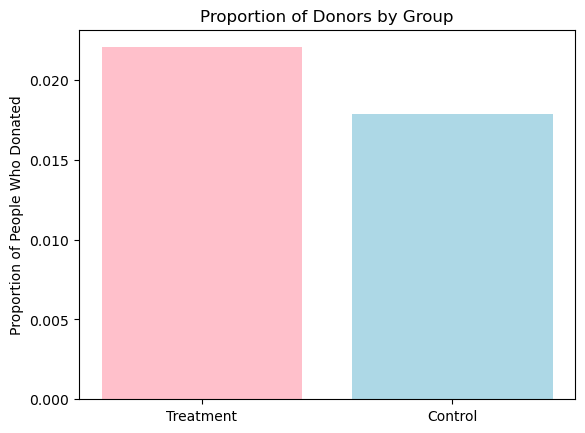

In [32]:
import matplotlib.pyplot as plt

treatment_proportion = treatment_data['gave'].mean()
control_proportion = control_data['gave'].mean()

plt.bar(['Treatment', 'Control'], [treatment_proportion, control_proportion], color=['pink', 'lightblue'])
plt.ylabel('Proportion of People Who Donated')
plt.title('Proportion of Donors by Group')
plt.show()

In [33]:
# T-test for the binary outcome 'gave'
treatment_gave = treatment_data['gave']
control_gave = control_data['gave']
t_stat_gave, p_value_gave = ttest_ind(treatment_gave, control_gave, equal_var=False)
print(f"T-test for 'gave': t-statistic = {t_stat_gave.round(4)}, p-value = {p_value_gave.round(4)}")

# Bivariate linear regression for 'gave'
gave_model = sm.OLS(data['gave'], data[['intercept', 'treatment']], missing='drop').fit()
print(gave_model.summary())
print(f"Linear regression for 'gave': t-statistic = {gave_model.tvalues['treatment'].round(4)}")

T-test for 'gave': t-statistic = 3.2095, p-value = 0.0013
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Mon, 21 Apr 2025   Prob (F-statistic):            0.00193
Time:                        16:22:47   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [34]:
print(f"Control Proportion: {control_proportion:.3f}")
print(f"Treatment Proportion: {treatment_proportion:.3f}")


Control Proportion: 0.018
Treatment Proportion: 0.022


In [53]:
# Probit regression for charitable donation
probit_model = sm.Probit(data['gave'], data[['intercept', 'treatment']])
probit_results = probit_model.fit()
print(probit_results.summary())

# 邊際效應估計
marginal_effects = probit_results.get_margeff()
print(marginal_effects.summary())


Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        00:08:21   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

In [36]:
from scipy.stats import ttest_ind

# Task 1: T-tests for match ratio effects on donation likelihood

# Filter data for each match ratio
ratio1_data = treatment_data[treatment_data['ratio'] == 1]
ratio2_data = treatment_data[treatment_data['ratio'] == 2]
ratio3_data = treatment_data[treatment_data['ratio'] == 3]

# Perform t-tests
t_stat_1v2, p_value_1v2 = ttest_ind(ratio1_data['gave'], ratio2_data['gave'], equal_var=False)
t_stat_2v3, p_value_2v3 = ttest_ind(ratio2_data['gave'], ratio3_data['gave'], equal_var=False)

print(f"T-test 1:1 vs 2:1 - t-statistic: {t_stat_1v2:.4f}, p-value: {p_value_1v2:.4f}")
print(f"T-test 2:1 vs 3:1 - t-statistic: {t_stat_2v3:.4f}, p-value: {p_value_2v3:.4f}")





T-test 1:1 vs 2:1 - t-statistic: -0.9650, p-value: 0.3345
T-test 2:1 vs 3:1 - t-statistic: -0.0501, p-value: 0.9600


In [62]:
data['ratio1'] = (data['ratio'] == 1).astype(int)

ratio_model = sm.OLS(data['gave'], data[['intercept', 'ratio1', 'ratio2', 'ratio3']], missing='drop').fit()
print(ratio_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.665
Date:                Tue, 22 Apr 2025   Prob (F-statistic):             0.0118
Time:                        11:02:58   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50079   BIC:                        -5.322e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0179      0.001     16.225      0.0

In [38]:

# Task 3: Response rate differences
# Direct calculation from data
response_rate_1 = ratio1_data['gave'].mean()
response_rate_2 = ratio2_data['gave'].mean()
response_rate_3 = ratio3_data['gave'].mean()

diff_1v2 = response_rate_2 - response_rate_1
diff_2v3 = response_rate_3 - response_rate_2

print(f"Response rate difference 1:1 vs 2:1: {diff_1v2:.4f}")
print(f"Response rate difference 2:1 vs 3:1: {diff_2v3:.4f}")

Response rate difference 1:1 vs 2:1: 0.0019
Response rate difference 2:1 vs 3:1: 0.0001


In [39]:
# Differences from regression coefficients
coef_diff_1v2 = ratio_model.params['ratio2'] - ratio_model.params['ratio1']
coef_diff_2v3 = ratio_model.params['ratio3'] - ratio_model.params['ratio2']

print(f"Coefficient difference 1:1 vs 2:1: {coef_diff_1v2:.4f}")
print(f"Coefficient difference 2:1 vs 3:1: {coef_diff_2v3:.4f}")

Coefficient difference 1:1 vs 2:1: 0.0019
Coefficient difference 2:1 vs 3:1: 0.0001


In [40]:
# T-test for donation amount
treatment_amount = treatment_data['amount'].dropna()
control_amount = control_data['amount'].dropna()
t_stat_amount, p_value_amount = ttest_ind(treatment_amount, control_amount, equal_var=False)
print(f"T-test for donation amount: t-statistic = {t_stat_amount:.4f}, p-value = {p_value_amount:.4f}")

# Bivariate linear regression for donation amount
amount_model = sm.OLS(data['amount'], data[['intercept', 'treatment']], missing='drop').fit()
print(amount_model.summary())
print(f"Linear regression for donation amount: t-statistic = {amount_model.tvalues['treatment']:.4f}, p-value = {amount_model.pvalues['treatment']:.4f}")

T-test for donation amount: t-statistic = 1.9183, p-value = 0.0551
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.461
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0628
Time:                        16:22:48   Log-Likelihood:            -1.7946e+05
No. Observations:               50083   AIC:                         3.589e+05
Df Residuals:                   50081   BIC:                         3.589e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [41]:
# Filter data to include only those who made a donation
donors_data = data[data['amount'] > 0]

# Regression analysis for donation amount conditional on donating
donors_model = sm.OLS(donors_data['amount'], donors_data[['intercept', 'treatment']], missing='drop').fit()
print(donors_model.summary())

# Interpretation of the treatment coefficient
treatment_coef = donors_model.params['treatment']
print(f"Treatment coefficient: {treatment_coef:.4f}")

                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3374
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.561
Time:                        16:22:48   Log-Likelihood:                -5326.8
No. Observations:                1034   AIC:                         1.066e+04
Df Residuals:                    1032   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     45.5403      2.423     18.792      0.0

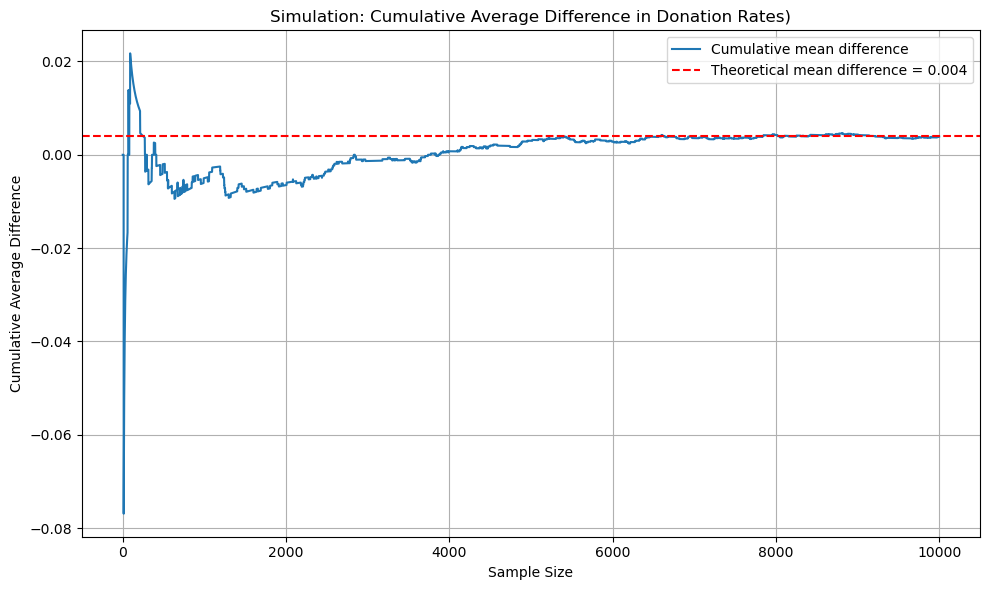

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# 模擬參數
n_control = 100000
n_treatment = 10000
p_control = 0.018
p_treatment = 0.022

# 隨機抽樣
np.random.seed(42)
control_draws = np.random.binomial(n=1, p=p_control, size=n_control)
treatment_draws = np.random.binomial(n=1, p=p_treatment, size=n_treatment)

# 從控制組中隨機抽出與 treatment 組一樣多的樣本
control_sample = np.random.choice(control_draws, size=n_treatment, replace=False)

# 計算逐筆差異
differences = treatment_draws - control_sample

# 計算累積平均
cumulative_avg = np.cumsum(differences) / np.arange(1, len(differences) + 1)

# 繪製圖形
plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg, label="Cumulative mean difference")
plt.axhline(y=0.004, color='red', linestyle='--', label="Theoretical mean difference = 0.004")
plt.title("Simulation: Cumulative Average Difference in Donation Rates)")
plt.xlabel("Sample Size")
plt.ylabel("Cumulative Average Difference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

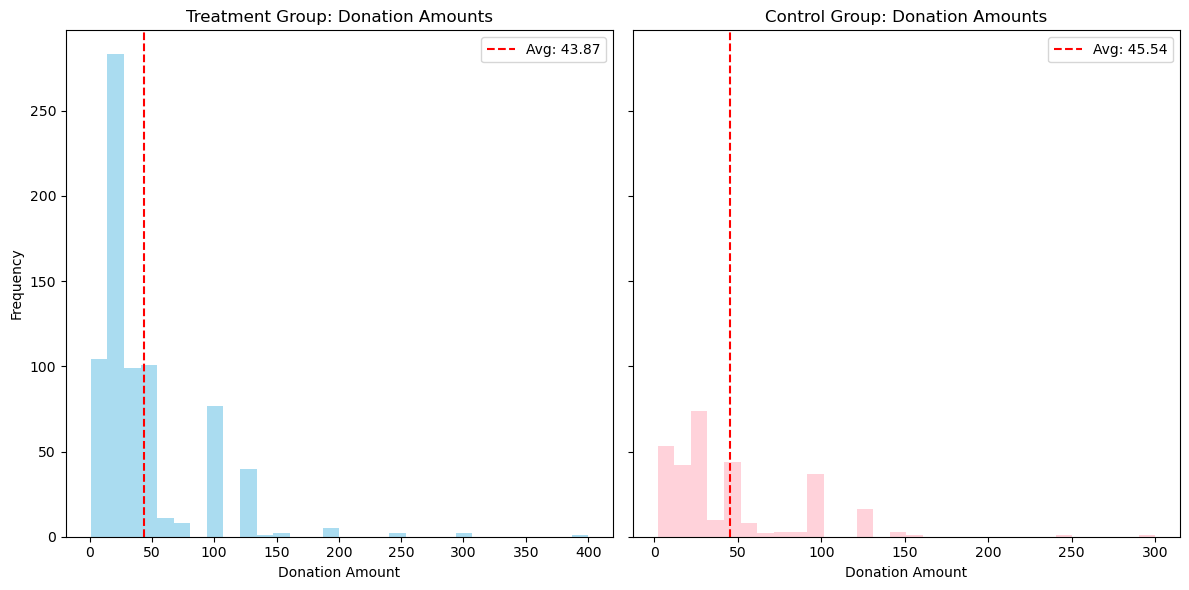

In [42]:
# Filter data for donors only
treatment_donors = treatment_data[treatment_data['amount'] > 0]
control_donors = control_data[control_data['amount'] > 0]

# Calculate sample averages
treatment_avg = treatment_donors['amount'].mean()
control_avg = control_donors['amount'].mean()

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Treatment group histogram
axes[0].hist(treatment_donors['amount'], bins=30, color='skyblue', alpha=0.7)
axes[0].axvline(treatment_avg, color='red', linestyle='--', label=f'Avg: {treatment_avg:.2f}')
axes[0].set_title('Treatment Group: Donation Amounts')
axes[0].set_xlabel('Donation Amount')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Control group histogram
axes[1].hist(control_donors['amount'], bins=30, color='pink', alpha=0.7)
axes[1].axvline(control_avg, color='red', linestyle='--', label=f'Avg: {control_avg:.2f}')
axes[1].set_title('Control Group: Donation Amounts')
axes[1].set_xlabel('Donation Amount')
axes[1].legend()

plt.tight_layout()
plt.show()

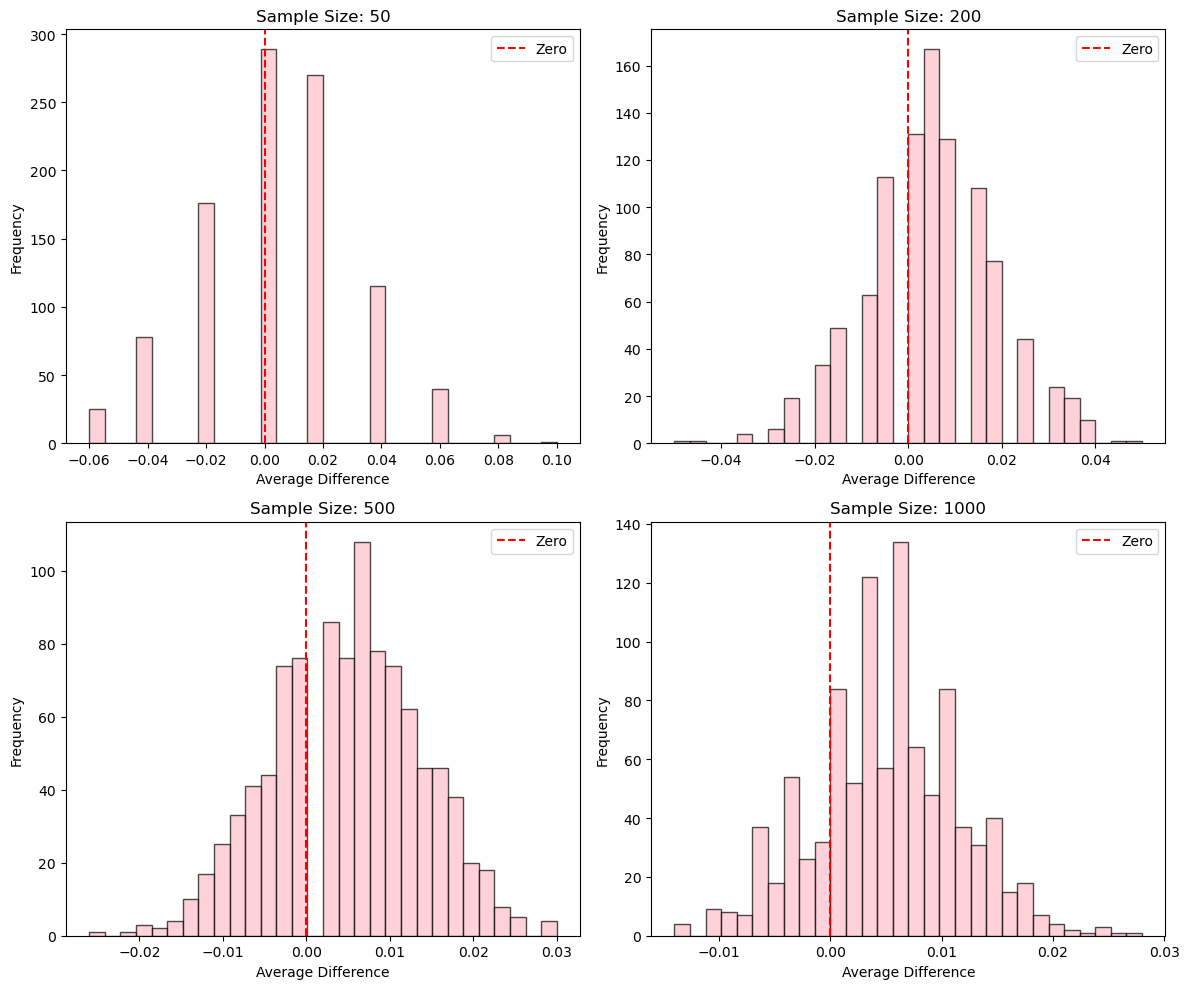

In [45]:
# Define sample sizes
sample_sizes = [50, 200, 500, 1000]

# Initialize a figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through each sample size
for i, sample_size in enumerate(sample_sizes):
    avg_differences = []
    
    # Simulate 1000 averages
    for _ in range(1000):
        treatment_sample = np.random.choice(treatment_draws, size=sample_size, replace=True)
        control_sample = np.random.choice(control_draws, size=sample_size, replace=True)
        avg_differences.append(np.mean(treatment_sample - control_sample))
    
    # Plot histogram
    axes[i].hist(avg_differences, bins=30, color='pink', edgecolor='black', alpha=0.7)
    axes[i].axvline(0, color='red', linestyle='--', label='Zero')
    axes[i].set_title(f'Sample Size: {sample_size}')
    axes[i].set_xlabel('Average Difference')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()